In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_features = pd.read_csv("training_set_features.csv")

In [3]:
df_features

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [4]:
df_labels = pd.read_csv("training_set_labels (1).csv")

In [5]:
df_labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [6]:
df_features.income_poverty.value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64

In [7]:
df_features.marital_status.value_counts()

Married        13555
Not Married    11744
Name: marital_status, dtype: int64

In [8]:
df_features.employment_status.value_counts()

Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment_status, dtype: int64

In [9]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [10]:
df_features[["age_group", "education", "race", "sex"]]

,age_group,education,race,sex
0,55 - 64 Years,< 12 Years,White,Female
1,35 - 44 Years,12 Years,White,Male
2,18 - 34 Years,College Graduate,White,Male
3,65+ Years,12 Years,White,Female
4,45 - 54 Years,Some College,White,Female
...,...,...,...,...
26702,65+ Years,Some College,White,Female
26703,18 - 34 Years,College Graduate,White,Male
26704,55 - 64 Years,Some College,White,Female
26705,18 - 34 Years,Some College,Hispanic,Female


In [11]:
df_features.age_group.value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

In [12]:
df_features.education.value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64

In [13]:
df_features.race.value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

<AxesSubplot:>

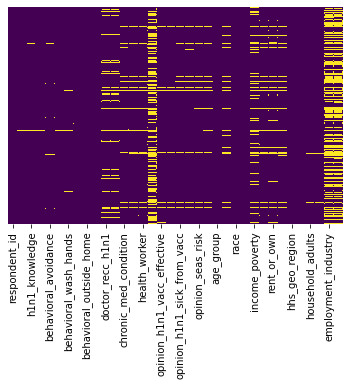

In [14]:
sns.heatmap(df_features.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
df_features.employment_industry.value_counts()

fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: employment_industry, dtype: int64

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

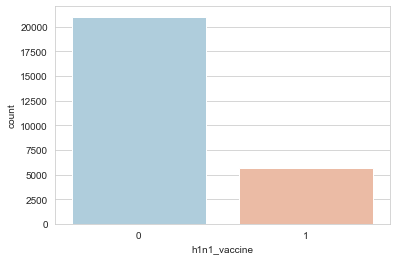

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='h1n1_vaccine',data=df_labels,palette='RdBu_r')

In [17]:
df_labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [18]:
df_merge = df_features.merge(df_labels, left_on='respondent_id', right_on='respondent_id')

df_merge

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [19]:
df_merge_h1n1 = df_merge.drop(["seasonal_vaccine"], axis=1)

df_merge_h1n1

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0


In [20]:
df_merge_seasonal = df_merge.drop(["h1n1_vaccine"], axis=1)
df_merge_seasonal

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0


In [21]:
df_merge_h1n1_exp = df_merge_h1n1.copy()

In [22]:
dropped_col = ["health_insurance", "employment_industry", "employment_occupation"]

In [23]:
df_h1n1_drop = df_merge_h1n1_exp.drop(dropped_col, axis=1)

In [24]:
df_h1n1_cleaned = df_h1n1_drop.dropna()

In [25]:
df_h1n1_cleaned

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Male,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Female,"> $75,000",Married,Own,Not in Labor Force,lzgpxyit,"MSA, Principle City",1.0,0.0,0
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,Female,"> $75,000",Not Married,Rent,Not in Labor Force,fpwskwrf,"MSA, Principle City",3.0,0.0,0
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,0


In [26]:
(26707 - 19642) / 26707

0.2645373872018572

In [27]:
df_h1n1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                19642 non-null  int64  
 1   h1n1_concern                 19642 non-null  float64
 2   h1n1_knowledge               19642 non-null  float64
 3   behavioral_antiviral_meds    19642 non-null  float64
 4   behavioral_avoidance         19642 non-null  float64
 5   behavioral_face_mask         19642 non-null  float64
 6   behavioral_wash_hands        19642 non-null  float64
 7   behavioral_large_gatherings  19642 non-null  float64
 8   behavioral_outside_home      19642 non-null  float64
 9   behavioral_touch_face        19642 non-null  float64
 10  doctor_recc_h1n1             19642 non-null  float64
 11  doctor_recc_seasonal         19642 non-null  float64
 12  chronic_med_condition        19642 non-null  float64
 13  child_under_6_mo

In [77]:
from sklearn.preprocessing import OneHotEncoder

In [78]:
category_obj = ["age_group","education","race","sex","income_poverty","marital_status","rent_or_own","employment_status","hhs_geo_region","census_msa"]

In [79]:
df_h1n1_cleaned[category_obj]

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City"
5,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City"
...,...,...,...,...,...,...,...,...,...,...
26700,55 - 64 Years,12 Years,White,Female,"> $75,000",Married,Own,Not in Labor Force,lzgpxyit,"MSA, Principle City"
26701,18 - 34 Years,College Graduate,White,Female,"> $75,000",Not Married,Rent,Not in Labor Force,fpwskwrf,"MSA, Principle City"
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City"


In [80]:
df_h1n1_cleaned.sex.value_counts()

Female    11638
Male       8004
Name: sex, dtype: int64

In [81]:
df_h1n1_cleaned.marital_status.value_counts()

Married        10768
Not Married     8874
Name: marital_status, dtype: int64

In [82]:
df_h1n1_cleaned.rent_or_own.value_counts()

Own     14980
Rent     4662
Name: rent_or_own, dtype: int64

In [83]:
df_h1n1_cleaned.employment_status.value_counts()

Employed              11093
Not in Labor Force     7417
Unemployed             1132
Name: employment_status, dtype: int64

In [84]:
df_h1n1_cleaned.census_msa.value_counts()

MSA, Not Principle  City    8571
MSA, Principle City         5717
Non-MSA                     5354
Name: census_msa, dtype: int64

In [85]:
df_h1n1_cleaned.hhs_geo_region.value_counts()

lzgpxyit    3098
fpwskwrf    2328
qufhixun    2309
oxchjgsf    2171
bhuqouqj    2138
kbazzjca    2062
mlyzmhmf    1658
lrircsnp    1541
atmpeygn    1521
dqpwygqj     816
Name: hhs_geo_region, dtype: int64

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
labelencoder = LabelEncoder()

In [88]:
df_h1n1_cleaned['marital_status_cat'] = labelencoder.fit_transform(df_h1n1_cleaned['marital_status'])
df_h1n1_cleaned['rentorown_cat'] = labelencoder.fit_transform(df_h1n1_cleaned['rent_or_own'])

df_h1n1_cleaned

C:\Users\IZZAN\AppData\Local\Temp\ipykernel_40672\1899703047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h1n1_cleaned['marital_status_cat'] = labelencoder.fit_transform(df_h1n1_cleaned['marital_status'])
C:\Users\IZZAN\AppData\Local\Temp\ipykernel_40672\1899703047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h1n1_cleaned['rentorown_cat'] = labelencoder.fit_transform(df_h1n1_cleaned['rent_or_own'])


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,marital_status_cat,rentorown_cat,sex_cat,employment_status_cat
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,1,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1,1,1,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1,1,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0,0,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Not in Labor Force,lzgpxyit,"MSA, Principle City",1.0,0.0,0,0,0,0,1
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,Not in Labor Force,fpwskwrf,"MSA, Principle City",3.0,0.0,0,1,1,0,1
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,0,1,0,0,1
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,0,1,1,1,0


In [89]:
df_h1n1_cleaned['sex_cat'] = labelencoder.fit_transform(df_h1n1_cleaned['sex'])


C:\Users\IZZAN\AppData\Local\Temp\ipykernel_40672\994368698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h1n1_cleaned['sex_cat'] = labelencoder.fit_transform(df_h1n1_cleaned['sex'])


In [90]:
df_h1n1_cleaned['employment_status_cat'] = labelencoder.fit_transform(df_h1n1_cleaned['employment_status'])

C:\Users\IZZAN\AppData\Local\Temp\ipykernel_40672\244225979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h1n1_cleaned['employment_status_cat'] = labelencoder.fit_transform(df_h1n1_cleaned['employment_status'])


In [91]:
dropped_cleaned = ["census_msa", "hhs_geo_region"]

In [92]:
df_h1n1_model = df_h1n1_cleaned.drop(dropped_cleaned, axis=1)

In [93]:
dropped_1 = ["sex","marital_status","rent_or_own","employment_status"]

In [94]:
df_h1n1_model['education_cat'] = labelencoder.fit_transform(df_h1n1_model['education'])
df_h1n1_model['income_pov_cat'] = labelencoder.fit_transform(df_h1n1_model['income_poverty'])

In [95]:
dropped_2 = ["education", "income_poverty", "race"]

In [96]:
df_h1n1_model = df_h1n1_model.drop(dropped_1, axis=1)

In [97]:
df_h1n1_model = df_h1n1_model.drop(dropped_2, axis=1)

In [98]:
df_h1n1_model["age_group"].value_counts()

65+ Years        4491
55 - 64 Years    4234
45 - 54 Years    4038
18 - 34 Years    3925
35 - 44 Years    2954
Name: age_group, dtype: int64

In [99]:
df_h1n1_model['age_cat'] = labelencoder.fit_transform(df_h1n1_model['age_group'])

In [100]:
df_model_final_1 = df_h1n1_model.drop("age_group", axis=1)

In [101]:
df_model_final_1 = df_model_final_1.drop("respondent_id", axis=1)

In [102]:
df_model_final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 19642 non-null  float64
 1   h1n1_knowledge               19642 non-null  float64
 2   behavioral_antiviral_meds    19642 non-null  float64
 3   behavioral_avoidance         19642 non-null  float64
 4   behavioral_face_mask         19642 non-null  float64
 5   behavioral_wash_hands        19642 non-null  float64
 6   behavioral_large_gatherings  19642 non-null  float64
 7   behavioral_outside_home      19642 non-null  float64
 8   behavioral_touch_face        19642 non-null  float64
 9   doctor_recc_h1n1             19642 non-null  float64
 10  doctor_recc_seasonal         19642 non-null  float64
 11  chronic_med_condition        19642 non-null  float64
 12  child_under_6_months         19642 non-null  float64
 13  health_worker   

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X = df_model_final_1.drop(['h1n1_vaccine'], axis = 1)
Y = df_model_final_1['h1n1_vaccine']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, test_size=0.20, 
                                                    random_state=101)

In [106]:
from sklearn.linear_model import LogisticRegression

In [108]:
logmodel = LogisticRegression()

In [109]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [110]:
predictions = logmodel.predict(X_test)

In [111]:
from sklearn.metrics import classification_report

In [112]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      3041
           1       0.71      0.47      0.57       888

    accuracy                           0.84      3929
   macro avg       0.79      0.71      0.73      3929
weighted avg       0.83      0.84      0.83      3929

